In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from stable_baselines import DQN
import gym

import glob
import json

from stable_baselines.results_plotter import load_results, ts2xy

In [2]:
# Utility functions for plotting reward
def smoothen_reward(reward, window):
    # Until window length, take cummulative average
    p1 = np.cumsum(reward[:window-1]) / (1+np.arange(window-1))
    # From window length, take moving average
    p2 = np.convolve(reward, np.ones(window), 'valid') / window
    
    return np.hstack((p1,p2))
    

In [19]:
log_dir = "./zoo/DQN.MlpPolicy01"
train_logs = glob.glob("{}/*.csv".format(log_dir))

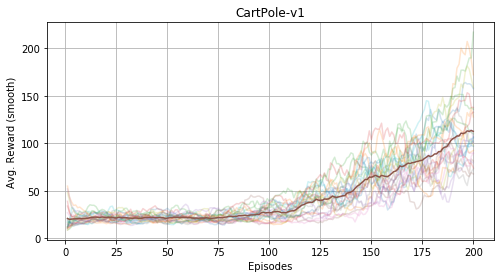

In [20]:
fig = plt.figure(figsize=(8,4))

# Get experiment name from log files
with open(train_logs[0], 'rt') as fh:
    first_line = fh.readline()
    assert first_line[0] == "#"
    header = json.loads(first_line[1:])

# Consolidate and plot data
run_data = None
for log in train_logs:
    monitor_file = log
    this_run_data = np.genfromtxt(monitor_file, delimiter=",", skip_header=2)[:,0]  # First column is the reward
    smooth_rew = smoothen_reward(this_run_data, 10)
    
    # Plot this run rewards per episode
    plt.plot(1+np.arange(len(smooth_rew)), smooth_rew, alpha=0.2)
    
    if run_data is not None:
        run_data = np.vstack((run_data, smooth_rew[:475]))
    else:
        run_data = smooth_rew[:475]

run_data_mean = np.mean(run_data, axis=0)

plt.plot(1+np.arange(len(run_data_mean)), run_data_mean)
plt.xlabel("Episodes")
plt.ylabel("Avg. Reward (smooth)")
plt.title(header["env_id"])
plt.grid()

Evaluate each model

In [21]:
trained_models = sorted(glob.glob("{}/*.model".format(log_dir)))
print("Found {} models.".format(len(trained_models)))

Found 25 models.


In [22]:
env = gym.make("CartPole-v1")

In [23]:
for model_file in trained_models:
    model = DQN.load(model_file)
    
    this_model_rew = []
    
    for rIdx in range(10):
        obs = env.reset()
        this_rew = 0
        for t in range(200):
            action, _ = model.predict(obs)
            obs, rew, done, info = env.step(action)
            this_rew += rew
            if done:
                break
        this_model_rew.append(this_rew)
    
    this_model_rew = np.array(this_model_rew)
    
    print("Model: {}    Reward = {:6.2f}, {:6.2f}".format(model_file, np.mean(this_model_rew), np.std(this_model_rew)))
    del model

Model: ./zoo/DQN.MlpPolicy01/000.model    Reward = 111.60,   8.73
Model: ./zoo/DQN.MlpPolicy01/001.model    Reward = 135.80,   4.87
Model: ./zoo/DQN.MlpPolicy01/002.model    Reward = 125.40,  17.81
Model: ./zoo/DQN.MlpPolicy01/003.model    Reward = 147.80,  23.93
Model: ./zoo/DQN.MlpPolicy01/004.model    Reward =  95.30,   5.88
Model: ./zoo/DQN.MlpPolicy01/005.model    Reward =  98.20,  12.92
Model: ./zoo/DQN.MlpPolicy01/006.model    Reward = 192.60,   4.59
Model: ./zoo/DQN.MlpPolicy01/007.model    Reward = 159.20,  31.63
Model: ./zoo/DQN.MlpPolicy01/008.model    Reward = 110.20,   6.63
Model: ./zoo/DQN.MlpPolicy01/009.model    Reward = 196.90,   5.82
Model: ./zoo/DQN.MlpPolicy01/010.model    Reward = 103.70,   3.82
Model: ./zoo/DQN.MlpPolicy01/011.model    Reward = 110.40,   5.97
Model: ./zoo/DQN.MlpPolicy01/012.model    Reward = 100.20,   4.58
Model: ./zoo/DQN.MlpPolicy01/013.model    Reward = 118.00,   3.49
Model: ./zoo/DQN.MlpPolicy01/014.model    Reward = 156.60,  22.15
Model: ./z